In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [3]:
def run_query(query):
    return pd.read_sql_query(query, engine)

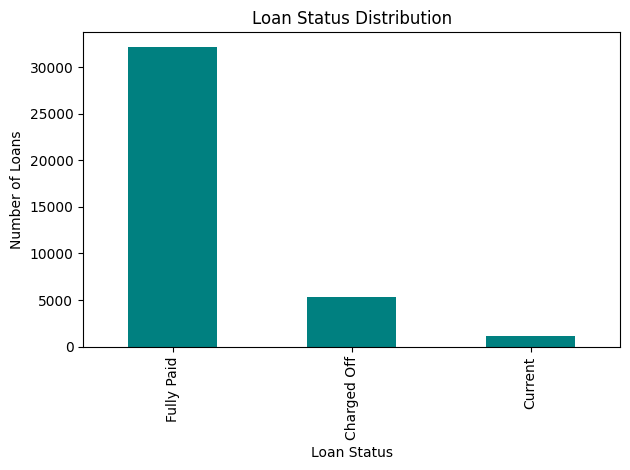

In [7]:
#Loan Status Breakdown
query2 = """
SELECT 
    loan_status,
    COUNT(id) AS total_loans,
    SUM(loan_amount) AS total_funded,
    SUM(total_payment) AS total_received,
    ROUND(SUM(total_payment)/SUM(loan_amount)*100,2) AS recovery_rate
FROM financial_loan
GROUP BY loan_status
ORDER BY total_loans DESC;
"""
status_df = run_query(query2)
status_df.plot(kind='bar', x='loan_status', y='total_loans', color='teal', legend=False)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans")
plt.tight_layout()
plt.show()

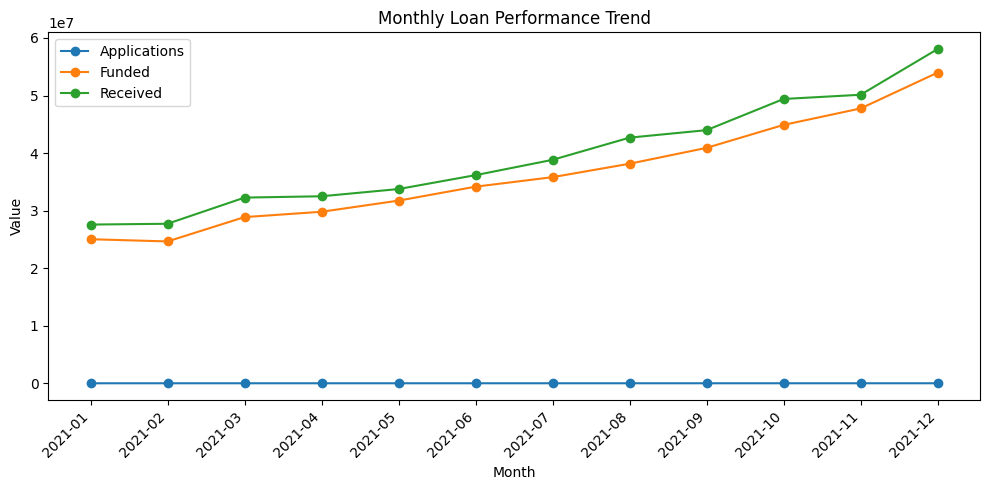

In [8]:
# Monthly Loan Trend
query3 = """
SELECT
    TO_CHAR(issue_date, 'YYYY-MM') AS month,
    COUNT(id) AS applications,
    SUM(loan_amount) AS funded,
    SUM(total_payment) AS received
FROM financial_loan
GROUP BY month
ORDER BY month;
"""
month_df = run_query(query3)
plt.figure(figsize=(10,5))
plt.plot(month_df['month'], month_df['applications'], marker='o', label='Applications')
plt.plot(month_df['month'], month_df['funded'], marker='o', label='Funded')
plt.plot(month_df['month'], month_df['received'], marker='o', label='Received')
plt.title("Monthly Loan Performance Trend")
plt.xlabel("Month")
plt.ylabel("Value")
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

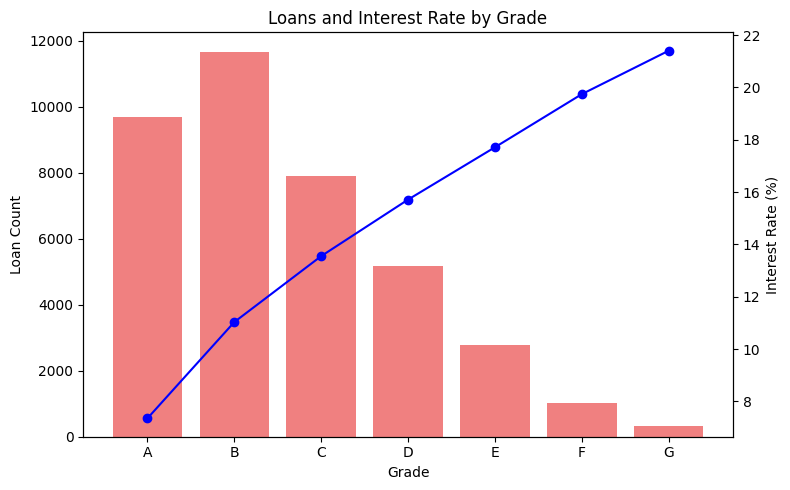

In [15]:
# Grade Analysis
query4 = """
SELECT 
    grade,
    COUNT(id) AS total_loans,
    ROUND((AVG(int_rate)::NUMERIC*100),2) AS avg_interest_rate,
    ROUND((AVG(dti)::NUMERIC*100),2) AS avg_dti,
    SUM(loan_amount) AS total_funded,
    SUM(total_payment) AS total_received
FROM financial_loan
GROUP BY grade
ORDER BY grade;
"""
grade_df = run_query(query4)
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(grade_df['grade'], grade_df['total_loans'], color='lightcoral', label='Total Loans')
ax2 = ax1.twinx()
ax2.plot(grade_df['grade'], grade_df['avg_interest_rate'], color='blue', marker='o', label='Avg Interest')
ax1.set_title("Loans and Interest Rate by Grade")
ax1.set_xlabel("Grade")
ax1.set_ylabel("Loan Count")
ax2.set_ylabel("Interest Rate (%)")
plt.tight_layout()
plt.show()

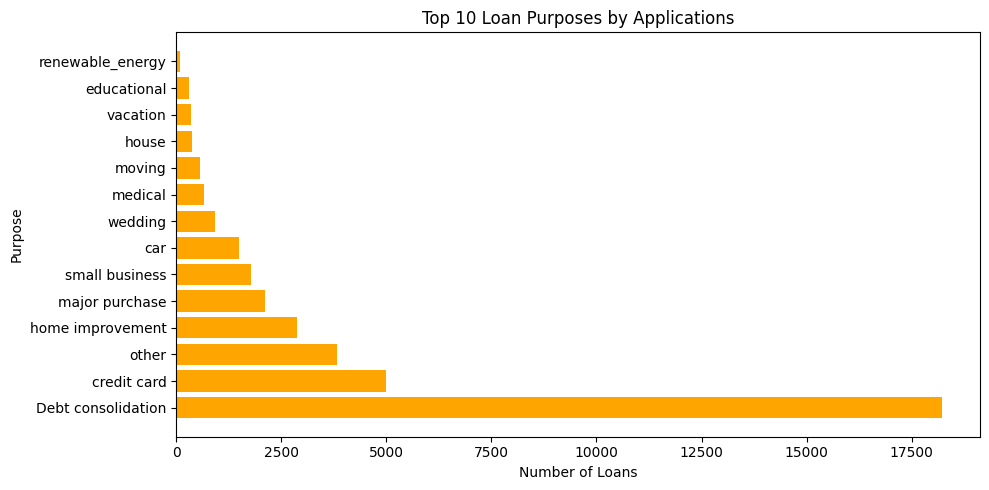

In [11]:
# Purpose-Based Loan Split
query5 = """
SELECT 
    purpose,
    COUNT(id) AS total_loans,
    SUM(loan_amount) AS total_funded,
    SUM(total_payment) AS total_received,
    ROUND((AVG(int_rate)::NUMERIC * 100), 2) AS avg_int_rate
FROM financial_loan
GROUP BY purpose
ORDER BY total_loans DESC;
"""
purpose_df = run_query(query5)
plt.figure(figsize=(10,5))
plt.barh(purpose_df['purpose'], purpose_df['total_loans'], color='orange')
plt.title("Top 10 Loan Purposes by Applications")
plt.xlabel("Number of Loans")
plt.ylabel("Purpose")
plt.tight_layout()
plt.show()


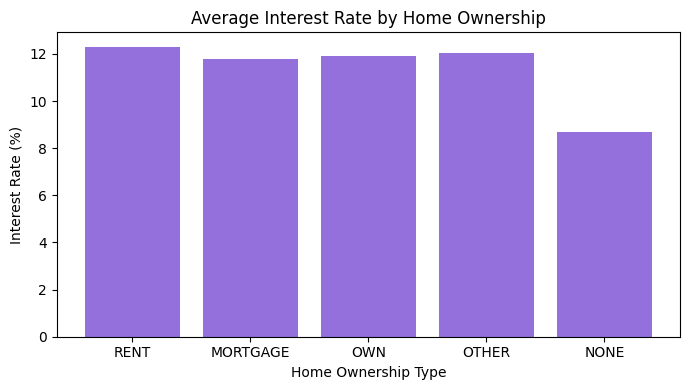

In [12]:
# Home Ownership Analysis
query6 = """
SELECT 
    home_ownership,
    COUNT(id) AS total_loans,
    ROUND(AVG(loan_amount)) AS avg_loan,
    ROUND((AVG(int_rate)::NUMERIC * 100), 2) AS avg_interest_rate,
    ROUND((SUM(total_payment)::NUMERIC / SUM(loan_amount)) * 100, 2) AS recovery_rate
FROM financial_loan
GROUP BY home_ownership
ORDER BY total_loans DESC;
"""
home_df = run_query(query6)
plt.figure(figsize=(7,4))
plt.bar(home_df['home_ownership'], home_df['avg_interest_rate'], color='mediumpurple')
plt.title("Average Interest Rate by Home Ownership")
plt.xlabel("Home Ownership Type")
plt.ylabel("Interest Rate (%)")
plt.tight_layout()
plt.show()

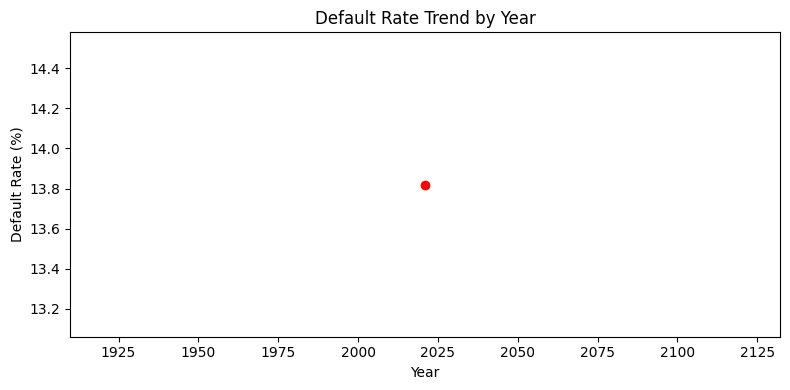

In [13]:
# Default Trend by Year
query7 = """
SELECT 
    EXTRACT(YEAR FROM issue_date) AS year,
    COUNT(CASE WHEN loan_status = 'Charged Off' THEN 1 END) AS defaults,
    COUNT(id) AS total_loans,
    ROUND((COUNT(CASE WHEN loan_status = 'Charged Off' THEN 1 END)::NUMERIC / COUNT(id)) * 100, 2) AS default_rate
FROM financial_loan
GROUP BY year
ORDER BY year;
"""
default_df = run_query(query7)
plt.figure(figsize=(8,4))
plt.plot(default_df['year'], default_df['default_rate'], marker='o', color='red')
plt.title("Default Rate Trend by Year")
plt.xlabel("Year")
plt.ylabel("Default Rate (%)")
plt.tight_layout()
plt.show()